# Analyze forcing data
Estimate half-life and correlation length scales

In [55]:
from fmdap import AR1
from mikeio import Dfsu
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
wind_file = '../tests/testdata/Wind_1hr.dfsu'
dfs = Dfsu(wind_file)
dfs

Dfsu2D
Number of elements: 958
Number of nodes: 570
Projection: LONG/LAT
Items:
  0:  Wind speed <Wind speed> (meter per sec)
  1:  Wind direction <Wind Direction> (degree)
Time: 67 steps with dt=3600.0s
      2017-10-27 00:00:00 -- 2017-10-29 18:00:00

## Estimate half-life
Assuming the wind time propagation is a AR(1) process. We extract a time series in a random point and estimate the half-life.

In [98]:
df = dfs.read(items=["Wind speed"], elements=[45]).to_dataframe()

<AxesSubplot:>

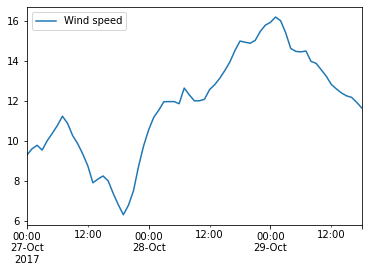

In [99]:
df.plot();

In [102]:
rho = AR1.estimate_AR1_halflife(df)
rho/3600   # half life in hours

33.99428940899274

## Estimate spatial correlation

In [103]:
ds = dfs.read(items=["Wind speed"], elements=[1,4,10,123,451])